In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [54]:
# load data
np_data = np.load("data/dataRS.npy")
df = pd.DataFrame(np_data[:,:5], columns=["freq","aoa","chord","vel","thickness"])#,"noise"])
df.tail()

,freq,aoa,chord,vel,thickness
1498,0.116162,0.702703,0.272727,0.199495,0.904111
1499,0.148990,0.702703,0.272727,0.199495,0.904111
1500,0.191919,0.702703,0.272727,0.199495,0.904111
1501,0.242424,0.702703,0.272727,0.199495,0.904111
1502,0.308081,0.702703,0.272727,0.199495,0.904111


In [55]:
# correlation matrix
df.corr().style.background_gradient(cmap='coolwarm')

,freq,aoa,chord,vel,thickness
freq,1.000000,-0.272765,-0.003661,0.133664,-0.230107
aoa,-0.272765,1.000000,-0.504868,0.058760,0.753394
chord,-0.003661,-0.504868,1.000000,0.003787,-0.220842
vel,0.133664,0.058760,0.003787,1.000000,-0.003974
thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000


In [71]:
# perform PCA
latent_dim = 3
pca = PCA(n_components=latent_dim,)
pca_results = pca.fit_transform(df)
print('Shape before PCA: ', df.shape)
print('Shape after PCA: ', pca_results.shape)

Shape before PCA:  (1503, 5)
Shape after PCA:  (1503, 3)


<BarContainer object of 3 artists>

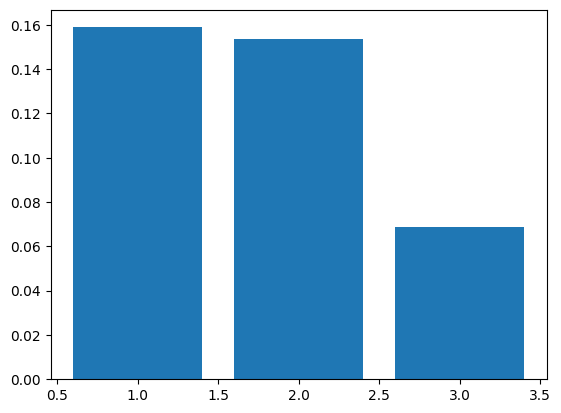

In [72]:
# show variance of pca features
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

In [61]:
# correlation matrix
pd.DataFrame(pca_results).corr().style.background_gradient(cmap='coolwarm')

,0,1,2
0,1.000000,-0.000000,0.000000
1,-0.000000,1.000000,-0.000000
2,0.000000,-0.000000,1.000000


In [62]:
components = pca.transform(df)
projected = pca.inverse_transform(components)
print(projected.shape)
print(components.shape)

(1503, 5)
(1503, 3)
